# 1.

**Write a scraper to fetch messages posted in Edmunds.com discussion forums. The scraper output should be a .csv file with the following columns: date and message (even though you will only use the messages in your analysis). Before you develop the scraper, carefully study one of the forums on Edmunds.com to understand the html as well as the threading structures.**


We start by installing sellenium and some dependencies. 

In [ ]:
#Import Pandas
import pandas as pd

# Import Selenium
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 2.3 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,430 kB]
Hit:12 http://ppa.launchpa

Then, we build relevant functions to process the data from the scraping. 

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")

In [ ]:
# This function returns every comment in an Edmund page
# split by date and text
# Returns: DataFrame from Pandas library
import re

def edmundo_return_comments(url_Link):
  # Initializing variables
  messages = []
  dates = []
  # Browsing Initialization
  wd.get(url_Link)
  comments = wd.find_elements_by_class_name("Comment")

  import pandas as pd
  df_model_brands = pd.read_csv(r"car-models-brands.csv", sep=',')
  brands = df_model_brands.iloc[:, 0].values.tolist()
  brand_models = df_model_brands.iloc[:, 1].values.tolist()

  # Creating the list of comments for a page - For each comment
  for x in range(len(comments)):
    text = comments[x].find_elements_by_class_name("Message.userContent")[0].text
    for modelIdx in range(len(brand_models)):
      text = text.lower().replace(str(brand_models[modelIdx]), str(brands[modelIdx]))
    # text = text.replace(brand_model, brand_name)
    # text = re.sub("[\W_]+", " ", text).lower()
    text = re.sub("[][(){},.;!?<>%'@#*\"]", "", text).lower()
    messages.append(text)
    dates.append(comments[x].find_elements_by_class_name("MItem.DateCreated")[0].text)
  
  if len(messages) != 0 and len(dates) != 0:
    df = pd.DataFrame(list(zip(dates, messages)), columns=['Dates', 'Messages'])
    return df
  else:
    return False

edmundo_return_comments("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")

,Dates,Messages
0,March 2002,i personally think that with a few tweaks the ...
1,March 2002,i am debating a new purchase and these two are...
2,March 2002,great handling rwd excellent engine and the be...
3,March 2002,and no manual tranny that may not matter to yo...
4,March 2002,one beauty of bmw 3 series is that there are s...
5,March 2002,good grief so you wait 9 months for the manual...
6,March 2002,ill give it a fair shot when the manual comes ...
7,March 2002,i understand its not about the speed i really ...
8,March 2002,it sounds like you know why i wont even put it...
9,March 2002,is there such a thing as an automatic-only tru...


In [ ]:
def edmundo_next_page(current_url_Link):
  # Browsing Initialization
  wd.get(current_url_Link)
  try:
    next_Link = wd.find_element_by_class_name("Next").get_attribute("href")
  except:
    # print("There is no NEXT PAGE")
    return False
  else:
    # Sanity checks for the possible URLs we can have in return
    # print("Checking URLs")
    # print(next_Link)
    if next_Link != current_url_Link and next_Link != None:
      return next_Link
    else:
      return False

edmundo_next_page("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p433")

'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p434'

In [ ]:
def clean_duplicated_texts(dataframe):
  for post_location in range(len(dataframe['Messages'])):
    if len(dataframe['Messages'].iloc[post_location]) > 20:
      # We just want quoted posts bigger than a certain length
      # because we don't want to remove comments like "thank you" or "amen"
      for other_post_location in range(len(dataframe['Messages'])):
        if other_post_location != post_location: 
          if dataframe['Messages'].iloc[post_location] in dataframe['Messages'].iloc[other_post_location]:
            # print(dataframe['Messages'].iloc[post_location])
            # print(dataframe['Messages'].iloc[other_post_location])
            # print("It seems there are some quotations here !")
            # print(dataframe['Messages'].iloc[other_post_location].replace(dataframe['Messages'].iloc[post_location], ""))
            dataframe['Messages'].iloc[other_post_location] = dataframe['Messages'].iloc[other_post_location].replace(dataframe['Messages'].iloc[post_location], "")

# 2.

**Fetch around 5000 posts about cars from the Entry Level Luxury forum** https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

Now, we perform the actual scraping. While we scrape the data we also do some proprocessing and start replacing models with brands. We make sure to keep 2 datasets in order to generate to files:
* Edmund_5k_posts (scraping without processing)
* Edmund_5k_posts_cleaned (scraping with clean up and processing)

In [ ]:
## This part takes around 11 minutes to run

next_URL = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
there_is_a_next_page = True
df = pd.DataFrame()
max_posts_to_get = 0

## Main code for the web scrapper
## It will loop all possible pages in a topic,
## press the << next page >> button and get all
## content available
while(there_is_a_next_page and max_posts_to_get <= 5000):
  # print("Started")
  # Getting comments from a page
  try:
    # print("Concatenating comments in the DataFrame")
    df = pd.concat([df, edmundo_return_comments(next_URL)])
    max_posts_to_get = len(df)
    print(max_posts_to_get)
  except:
    # print("No comments in the page")
    pass
  else:
    pass
  
  # Getting the next page
  if edmundo_next_page(next_URL) != False:
    next_URL = edmundo_next_page(next_URL)
    there_is_a_next_page = True
  else:
    # print("Should stop now")
    there_is_a_next_page = False

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050


In [ ]:
df.shape

(5050, 2)

In [ ]:
## As we can see in this visualization of the dataset, we have choosen to work with
## the early posts in that particular topic - around 1st / 2nd quarter 2002
df.head()

,Dates,Messages
0,March 2002,i personally think that with a few tweaks the ...
1,March 2002,i am debating a new purchase and these two are...
2,March 2002,great handling rwd excellent engine and the be...
3,March 2002,and no manual tranny that may not matter to yo...
4,March 2002,one beauty of bmw 3 series is that there are s...


In [ ]:
df.drop_duplicates()
df.shape

(5050, 2)

In [ ]:
# It takes 10 minutes to clean out everything
# quoted / duplicates in the dataset
df_cleaned = df.copy(deep=True)
clean_duplicated_texts(df_cleaned)

In [ ]:
df_cleaned.head()

,Dates,Messages
0,March 2002,i personally think that with a few tweaks the ...
1,March 2002,i am debating a new purchase and these two are...
2,March 2002,great handling rwd excellent engine and the be...
3,March 2002,and no manual tranny that may not matter to yo...
4,March 2002,one beauty of bmw 3 series is that there are s...


In [ ]:
# Writing the cleaned up DataFrame to CSV
df.to_csv("Edmund_5k_posts.csv", index=False)
df_cleaned.to_csv("Edmund_5k_posts_cleaned.csv", index=False)

Now, we start by producing a file with the **word count** that will enable other tasks to start without scraping every time.

In [ ]:
# Importing Pandas
import pandas as pd

# Reading all the pdfs CSV file
# into a Pandas dataframe structure
df_posts = pd.read_csv(r"Edmund_5k_posts_cleaned.csv", sep=',') # multiLine=True
df_posts.head()

,Dates,Messages
0,March 2002,i personally think that with a few tweaks the ...
1,March 2002,i am debating a new purchase and these two are...
2,March 2002,great handling rwd excellent engine and the be...
3,March 2002,and no manual tranny that may not matter to yo...
4,March 2002,one beauty of bmw 3 series is that there are s...


In [ ]:
# Let's define a list of stopwords to get
# a better words count. It serves to clean up the text
# We got some of words in the list below from wikipedia and others
# from manual selection in the dataset
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", \
             "ourselves", "you", "your", "yours", "yourself", "yourselves", \
             "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", \
             "its", "itself", "they", "them", "their", "theirs", "themselves", "what", \
             "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", \
             "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", \
             "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", \
             "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", \
             "between", "into", "through", "during", "before", "after", "above", "below", \
             "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", \
             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", \
             "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", \
             "not", "only", "own", "same", "so", "than", "too", "very", "t", "can", "will", \
             "just", "don", "should", "now", "=", "et", "The", "al.,", "In", "We", "+", "-", \
             "&", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "−", "", "∈", "\t", "cid", \
             "al", "q", "w", "e", "r", "t", "y", "u", "i", "o", "p", "a", "s", "d", "f", "g", \
             "h", "j", "k", "l", "z", "x", "c", "v", "b", "n", "m", "µ", "re", "ct", "αk", \
             "dp", "l0", "l1", "l2", "yt", "xt", "σ", "ms", "λi", "aij"]

# df_cleaned_no_stopwords = df_cleaned[~df_cleaned['words'].isin(stopwords)]
# df_cleaned_no_stopwords

In [ ]:
# Applying a query to dataframe to count words
# We are counting words PER MESSAGE
# which means that we do not consider how many times the same word
# has been written in the same << post >>
list_of_unique_words = []

for rows in df_posts['Messages']:
  for words in str(rows).split(" "):
    # Checking 3 conditions:
    # 1. the word is not already in the canonical list of words
    # 2. the word length is greater than 3
    # 3. the word is not a stopword
    if not (str(words) in list_of_unique_words) and len(str(words)) >= 3 and not (str(words) in stopwords):
      list_of_unique_words.append(str(words))

list_of_unique_words

['personally',
 'think',
 'tweaks',
 'c320',
 'could',
 'also',
 'sit',
 'top',
 'group',
 'still',
 'entry-level',
 'luxury',
 'sedan',
 'mercedes',
 'would',
 'lead',
 'believe',
 'sport',
 'needs',
 'suspension',
 'retuned',
 'accept',
 'inch',
 'tires',
 'without',
 'harsh',
 'ride',
 'stop',
 'forcing',
 'metal',
 'trim',
 'black',
 'leather',
 'everyone',
 'wants',
 'package',
 'c240s',
 '6-speed',
 'wouldnt',
 'hurt',
 'either',
 'offered',
 'though',
 'fixed',
 'first\n\nthat',
 'toyotad',
 'favorite',
 'gasp',
 'new',
 'audi',
 'easily',
 'best',
 'interior',
 'sub-40k',
 'car',
 'combine',
 'stunning',
 'looks',
 'body',
 'rigid',
 'ever',
 'made',
 'personal',
 'single',
 'thing',
 'dont',
 'like',
 'grey',
 'around',
 'bottom',
 'doesnt',
 'match',
 'colors',
 'color',
 'anyway',
 'excellent',
 'opinion',
 '40k',
 'upcoming',
 'convertible',
 'coupe',
 'winners\n\nthe',
 'bmw',
 'old',
 'people',
 'starting',
 'tire',
 'bit',
 'save',
 'vhondants',
 'kind',
 'dissappointed'

In [ ]:
# This cell 3 takes minutes to complete
list_of_appearances_words = []
list_of_unique_appearances_words = []

# Counting << ONLY 1 >> the appearance of a word in the message post
for words in list_of_unique_words:
  count = 0
  for rows in df_posts['Messages']:
    if words in str(rows).split(" "):
      count += 1
    # for words in rows.split(" "):
    #   if str(words) in rows:
    #   print(posts)
    #   break
    # print(rows)
    # if str(words) in rows:
    #   count += 1

  list_of_unique_appearances_words.append(count)

# Counting << EVERY >> appearance of a word in the message post
# for words in list_of_unique_words:
#   count = 0
#   for rows in df_posts['Messages']:
#     if str(words) in str(rows):
#       count += str(rows).count(words)

#   list_of_appearances_words.append(count)

In [ ]:
list_of_appearances_words

[]

In [ ]:
list_of_unique_appearances_words

[74,
 932,
 6,
 25,
 423,
 526,
 35,
 211,
 37,
 529,
 55,
 433,
 633,
 190,
 1022,
 22,
 267,
 286,
 111,
 113,
 1,
 31,
 38,
 226,
 246,
 18,
 168,
 92,
 7,
 10,
 25,
 41,
 91,
 127,
 57,
 200,
 1,
 67,
 160,
 20,
 223,
 31,
 238,
 21,
 1,
 342,
 30,
 3,
 666,
 387,
 63,
 442,
 333,
 1,
 2477,
 6,
 6,
 212,
 79,
 16,
 212,
 226,
 85,
 56,
 307,
 1041,
 1242,
 7,
 306,
 54,
 394,
 46,
 9,
 33,
 77,
 77,
 158,
 33,
 35,
 54,
 221,
 1,
 1625,
 222,
 605,
 30,
 69,
 192,
 49,
 6,
 95,
 1,
 59,
 2,
 130,
 321,
 488,
 123,
 103,
 65,
 1,
 513,
 20,
 319,
 263,
 30,
 418,
 248,
 87,
 58,
 358,
 191,
 160,
 253,
 392,
 242,
 207,
 481,
 29,
 76,
 32,
 3,
 22,
 2,
 40,
 7,
 28,
 223,
 69,
 1,
 19,
 99,
 1078,
 27,
 129,
 418,
 49,
 2,
 41,
 107,
 122,
 355,
 23,
 14,
 1,
 64,
 192,
 356,
 103,
 6,
 242,
 288,
 10,
 9,
 90,
 16,
 1,
 244,
 16,
 6,
 1,
 28,
 359,
 135,
 87,
 465,
 705,
 85,
 30,
 72,
 1,
 219,
 405,
 1,
 30,
 132,
 131,
 34,
 175,
 605,
 148,
 1,
 957,
 338,
 11,
 27,
 276,
 21

In [ ]:
dict_unique_appearances_per_post = dict(zip(list_of_unique_words, list_of_unique_appearances_words))
dict_unique_appearances_per_post

{'personally': 74,
 'think': 932,
 'tweaks': 6,
 'c320': 25,
 'could': 423,
 'also': 526,
 'sit': 35,
 'top': 211,
 'group': 37,
 'still': 529,
 'entry-level': 55,
 'luxury': 433,
 'sedan': 633,
 'mercedes': 190,
 'would': 1022,
 'lead': 22,
 'believe': 267,
 'sport': 286,
 'needs': 111,
 'suspension': 113,
 'retuned': 1,
 'accept': 31,
 'inch': 38,
 'tires': 226,
 'without': 246,
 'harsh': 18,
 'ride': 168,
 'stop': 92,
 'forcing': 7,
 'metal': 10,
 'trim': 25,
 'black': 41,
 'leather': 91,
 'everyone': 127,
 'wants': 57,
 'package': 200,
 'c240s': 1,
 '6-speed': 67,
 'wouldnt': 160,
 'hurt': 20,
 'either': 223,
 'offered': 31,
 'though': 238,
 'fixed': 21,
 'first\n\nthat': 1,
 'toyotad': 342,
 'favorite': 30,
 'gasp': 3,
 'new': 666,
 'audi': 387,
 'easily': 63,
 'best': 442,
 'interior': 333,
 'sub-40k': 1,
 'car': 2477,
 'combine': 6,
 'stunning': 6,
 'looks': 212,
 'body': 79,
 'rigid': 16,
 'ever': 212,
 'made': 226,
 'personal': 85,
 'single': 56,
 'thing': 307,
 'dont': 1041,


In [ ]:
dict_appearances_per_post = dict(zip(list_of_unique_words, list_of_appearances_words))
dict_appearances_per_post

{}

In [ ]:
# Sorting dictionary << dict_unique_appearances_per_post >>
dict(sorted(dict_unique_appearances_per_post.items(), key=lambda item: item[1], reverse=True))

{'car': 2477,
 'bmw': 1625,
 'like': 1242,
 'one': 1078,
 'dont': 1041,
 'would': 1022,
 'get': 983,
 'infiniti': 957,
 'think': 932,
 'much': 734,
 'drive': 707,
 'better': 705,
 'even': 674,
 'new': 666,
 'sedan': 633,
 'performance': 628,
 'know': 628,
 'really': 612,
 'people': 605,
 'good': 605,
 'driving': 549,
 'well': 547,
 'want': 542,
 'still': 529,
 'also': 526,
 'acura': 513,
 'say': 497,
 'way': 488,
 'see': 481,
 'make': 478,
 'time': 465,
 'thats': 444,
 'best': 442,
 'luxury': 433,
 'could': 423,
 'buy': 422,
 'engine': 418,
 'lexus': 418,
 'going': 405,
 'great': 400,
 'honda': 395,
 'many': 395,
 'doesnt': 394,
 'price': 392,
 'series': 388,
 'audi': 387,
 'cant': 380,
 'less': 376,
 'years': 375,
 'back': 372,
 'rwd': 370,
 'take': 367,
 'ive': 359,
 'handling': 358,
 'right': 356,
 'look': 355,
 'power': 354,
 'never': 353,
 'test': 348,
 'toyotad': 342,
 'may': 338,
 'two': 338,
 'sure': 337,
 'interior': 333,
 'got': 333,
 'point': 330,
 'little': 321,
 'fwd': 319

In [ ]:
# Sorting dictionary << dict_appearances_per_post >>
dict(sorted(dict_appearances_per_post.items(), key=lambda item: item[1], reverse=True))

{}

In [ ]:
text1="I have a toyota and I don't care about anything ! else you understand ?!*@&#"
text2="Imagine that if you have a bmw 3-series, it wouldn't be a sur#prise if you get a fine running too fast!!!\n\n\n"

print(re.sub("\'", "", text2).lower())
print(re.sub("[][(){},.;!?<>%'@#*]", "", text2).lower())
print(re.sub("[\W_]+", " ", text2).lower())

imagine that if you have a bmw 3-series, it wouldnt be a sur#prise if you get a fine running too fast!!!



imagine that if you have a bmw 3-series it wouldnt be a surprise if you get a fine running too fast



imagine that if you have a bmw 3 series it wouldn t be a sur prise if you get a fine running too fast 


In [ ]:
dict_unique_appearances_per_post['pontiac5']

1

In [ ]:
column1 = list(dict_unique_appearances_per_post.keys())
column2 = list(dict_unique_appearances_per_post.values())
df_word_count = pd.DataFrame(list(zip(column1, column2)), columns=['Words', 'Count'])

# Exporting the word count dataframe as CSV file
df_word_count.to_csv("Word_Count.csv", index=False)
df_word_count.head()

,Words,Count
0,personally,74
1,think,932
2,tweaks,6
3,c320,25
4,could,423



# Task A: 

**Once you fetch the data, test if the data support Zipf’s law. Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.** *(in class, professor commented it would be better to remove stopwords for this exercise)*

We start this task by loading the Word_Count.csv file produced in the previous section. 

In [ ]:
# Reading all the pdfs CSV file
# into a Pandas dataframe structure
import pandas as pd

df_zipfs = pd.read_csv(r"Word_Count.csv", sep=',') # multiLine=True
df_zipfs.head()
df_zipfs['Count'] = pd.to_numeric(df_zipfs['Count'])

In [ ]:
df_zipfs.sort_values('Count', ascending=False)

,Words,Count
54,car,2477
82,bmw,1625
66,like,1242
132,one,1078
65,dont,1041
...,...,...
16234,23-liter,1
16233,aeros,1
16232,intercooler,1
16231,turbododge,1


In [ ]:
df_zipfs_subset = df_zipfs.sort_values('Count', ascending=False).head(100)
df_zipfs_subset

,Words,Count
54,car,2477
82,bmw,1625
66,like,1242
132,one,1078
65,dont,1041
...,...,...
113,nice,253
1237,problem,252
454,agree,251
107,actually,248


Now, we plot the word count based on the original frequencies.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


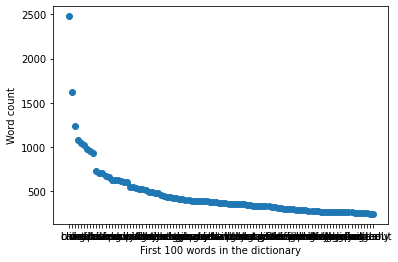

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# a simple line plot
# df_zipfs_subset.groupby('Words')['Count'].nunique().plot(kind='scatter')
# plt.show()

x = np.array(df_zipfs_subset['Words'])
y = np.array(df_zipfs_subset['Count'])

plt.scatter(x, y)
plt.axes().xaxis.set_label_text('First 100 words in the dictionary')
plt.axes().yaxis.set_label_text('Word count')
plt.show()

And now, we print the same but normalizing the data.

In [ ]:
df_zipfs_subset['Frequency'] = df_zipfs_subset['Count']/df_zipfs['Count'].sum()
df_zipfs_subset['Frequency'].sum()

0.23914286005899343

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


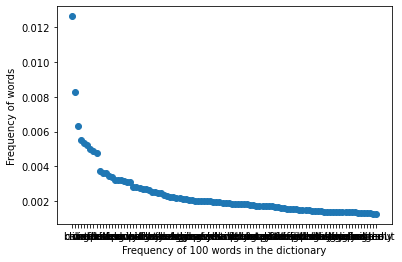

In [ ]:
x_freq = np.array(df_zipfs_subset['Words'])
y_freq = np.array(df_zipfs_subset['Frequency'])

plt.scatter(x_freq, y_freq)
plt.axes().xaxis.set_label_text('Frequency of 100 words in the dictionary')
plt.axes().yaxis.set_label_text('Frequency of words')
plt.show()

In [ ]:
list_zipfs = list(range(100))
list_zipfs[0] = 2477
for i in range(99):
  list_zipfs[i+1] = 0
  list_zipfs[i+1] = (float(list_zipfs[i])/2)/df_zipfs['Count'].sum()
list_zipfs[0] = list_zipfs[0]/df_zipfs['Count'].sum()
np.array(list_zipfs)

array([1.26407218e-002, 6.32036090e-003, 1.61271546e-008, 4.11503582e-014,
       1.05000046e-019, 2.67920141e-025, 6.83630190e-031, 1.74436396e-036,
       4.45095267e-042, 1.13571365e-047, 2.89790883e-053, 7.39435998e-059,
       1.88675913e-064, 4.81429094e-070, 1.22842375e-075, 3.13446969e-081,
       7.99797322e-087, 2.04077825e-092, 5.20728908e-098, 1.32870191e-103,
       3.39034138e-109, 8.65086036e-115, 2.20737019e-120, 5.63236828e-126,
       1.43716594e-131, 3.66710028e-137, 9.35704370e-143, 2.38756129e-148,
       6.09214737e-154, 1.55448405e-159, 3.96645145e-165, 1.01208739e-170,
       2.58246167e-176, 6.58945894e-182, 1.68137903e-187, 4.29023912e-193,
       1.09470568e-198, 2.79327208e-204, 7.12736684e-210, 1.81863265e-215,
       4.64045809e-221, 1.18406822e-226, 3.02129128e-232, 7.70918501e-238,
       1.96709049e-243, 5.01926598e-249, 1.28072557e-254, 3.26792404e-260,
       8.33849791e-266, 2.12766718e-271, 5.42899656e-277, 1.38527322e-282,
       3.53468982e-288, 9

In [ ]:
list_zipfs_inverse = list(range(100))
for i in range(100):
  if list_zipfs_inverse[i] != 0:
    list_zipfs_inverse[i] = 1/list_zipfs_inverse[i]

np.array(list_zipfs_inverse)

array([0.        , 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
       0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857,
       0.06666667, 0.0625    , 0.05882353, 0.05555556, 0.05263158,
       0.05      , 0.04761905, 0.04545455, 0.04347826, 0.04166667,
       0.04      , 0.03846154, 0.03703704, 0.03571429, 0.03448276,
       0.03333333, 0.03225806, 0.03125   , 0.03030303, 0.02941176,
       0.02857143, 0.02777778, 0.02702703, 0.02631579, 0.02564103,
       0.025     , 0.02439024, 0.02380952, 0.02325581, 0.02272727,
       0.02222222, 0.02173913, 0.0212766 , 0.02083333, 0.02040816,
       0.02      , 0.01960784, 0.01923077, 0.01886792, 0.01851852,
       0.01818182, 0.01785714, 0.01754386, 0.01724138, 0.01694915,
       0.01666667, 0.01639344, 0.01612903, 0.01587302, 0.015625  ,
       0.01538462, 0.01515152, 0.01492537, 0.01470588, 0.01449275,
       0.01428571, 0.01408451, 0.01388889, 0.01369863, 0.01351

The following is a plot of a theoretical result of the zipf's law.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


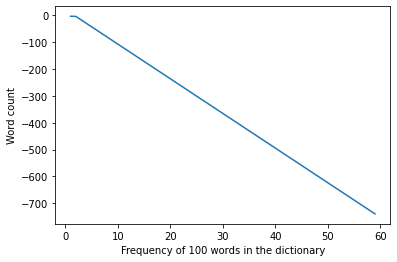

In [ ]:
x_freq_log = np.log(np.array(range(1, 101, 1)))
y_freq_log = np.log(np.array(df_zipfs_subset['Frequency']))
y_freq_ideal = np.log(np.array(list_zipfs))

# plt.scatter(x_freq_log, y_freq_log)
plt.plot(np.array(range(1, 101, 1)), y_freq_ideal)
plt.axes().xaxis.set_label_text('Frequency of 100 words in the dictionary')
plt.axes().yaxis.set_label_text('Word count')
plt.show()

Finally, we compare the theoretical result with our actual word count. We performed a linear regression to find the value of theta in the formula
$$ln(r) = \theta * ln (\frac{x_r}{n x_n}) + \epsilon$$

Based on this calculation, we found that theta = -1/2. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


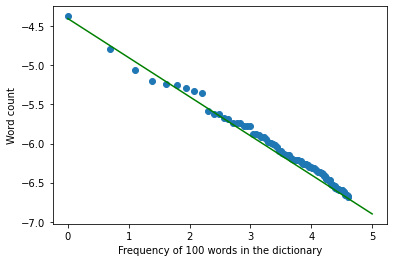

In [ ]:
# https://en.wikipedia.org/wiki/Zipf%27s_law
# https://en.wikipedia.org/wiki/File:Wikipedia-n-zipf.png
x_freq_log = np.log(np.array(range(1, 101, 1)))
y_freq_log = np.log(np.array(df_zipfs_subset['Frequency']))
y_freq_ideal = np.log(np.array(list_zipfs))

#We have performed a liner regression to adjust to the observed values
#with the linear function y = -1/2x - 4.4 (outside of this notebook)
plt.scatter(x_freq_log, y_freq_log)
x = np.linspace(0, 5, 100)
plt.plot(x, -1/2*x-4.4, linestyle='-', color="g")  # solid
# theta = -0.5
# error = bias = -4.4
plt.axes().xaxis.set_label_text('Frequency of 100 words in the dictionary')
plt.axes().yaxis.set_label_text('Word count')
plt.show()

Based on the above, the zipf's law seems to stand for our dataset. 

However, we will calculate the pvalue of the Zipfs law (observed vs theoretical) via the chi-squared distribution to validate the null hypothesis. 

$$H_1: ln(r) = \theta * ln (\frac{x_r}{n x_n}) + \epsilon$$

In [ ]:
from scipy.stats import chisquare

# observed points from the data set
# y_freq_log (from the word count dataframe - the top 100 words)

# Prepare a theoritical frequency based on zipf's law
# y will be the f_exp expected frequencies
y = []
for i in range(100):
  y.append(-1/2*i/20-4.4)

y = np.array(y)

# We shift the values just to get positive results (doesn't change the pvalue)
y_freq_log_shifted = y_freq_log + 7
y_shifted = y + 7

# Create a chisquare distribution
hypothesis_test = chisquare(y_freq_log_shifted, f_exp=y_shifted)

# Calculate the critical chi-square value just for comparison
sum = 0.0
for i in range(100):
  sum += ( ((y_freq_log_shifted[i]- y_shifted[i])**2)/y_shifted[i] )

print("Manual critical value is:", sum) 
print("Scipy stats critical value is:", hypothesis_test[0])
print("P-Value from Scipy status is:", hypothesis_test[1])

Manual critical value is: 23.989111513936095
Scipy stats critical value is: 23.989111513936102
P-Value from Scipy status is: 0.9999999999999996


Based on the p-value of 0.999999 we can conclude that the zipf's law null hypothesis can be proven true with a degree of confidence of 99%. (Significance level of 0.01 or less)

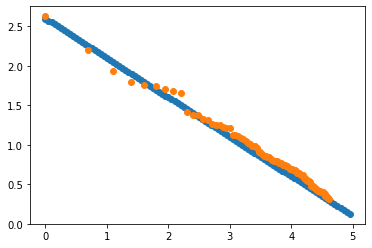

In [ ]:
list_x = []

for i in range(100):
  list_x.append(i/20)

plt.scatter(list_x, y_shifted)
plt.scatter(x_freq_log, y_freq_log_shifted)
plt.show()

**Note:** The above demonstrates that for the first 100 words there is theta such that 

$$ln(r) = \theta * ln ({K x_r}) + \epsilon$$

stands as a confident theoritical frequency distribution for each rank r= 1,2,3,4...

However, this means:

$$e^{ln(r)} = e^{\theta * ln ({K x_r}) + \epsilon}$$

$$r = e^{ln ({(K x_r)}^{\theta})} * e^{\epsilon}$$

$$r = {(K x_r)}^{\theta} * e^{\epsilon}$$

If we think of K and epsilon as constants, then:

$$r = x_r^{\theta} * c$$

But, theta = -1/2 means

$$r = \frac{c}{x_r^{1/2}}$$

Which is very similar to the initial proposal of the zipf's law except the rank is not inversely proportional to the frequency, but rather to the square root of the frequency. 

# Task B: 

**Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.**

We use the Word_Count.csv produced during scraping, and filter the top brands by using a comprehensive list of brands that we extracted from the "models to brands" mapping file.

In [ ]:
#Import Pandas
import pandas as pd

# Read word count, keeping the same variable name!!
df_word_count = pd.read_csv('Word_Count.csv')

# Declare all possible brands
all_brands = ['acura','audi','bmw','buick','cadillac','chevrolet','chrysler',
'dodge','ford','honda','hyundai','infiniti','kia','lexus','lincoln','mazda',
'mercedes','mercury','mitsubishi','nissan','pontiac',
'saturn', 'subaru','suzuki','toyota','volkswagen',
'volkwagen','volvo']

# This is not used, is just to keep track
other_key_words = ['car', 'sedan', 'problem']

# Filter the overall word count with all_brands as filter
df_filtered_word_count = df_word_count.loc[df_word_count['Words'].isin(all_brands)]

# Sort by count descending
all_brands_df = df_filtered_word_count.sort_values(by=['Count'], ascending=False)

#Generate all_brands and top_brands lists
all_brands = all_brands_df.iloc[:,0].tolist()
top_brands = all_brands_df.iloc[0:10,0].tolist()
print("The top 10 brands are: ", top_brands)

The top 10 brands are:  ['bmw', 'infiniti', 'acura', 'lexus', 'honda', 'audi', 'nissan', 'cadillac', 'toyota', 'subaru']


# Task C: 
**Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post**

We load the scraping data and define the relevant input parameters for this section.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from collections import defaultdict

##### Input PARAMETERS
# 1) Python List with the top-10 brands, calculated above
# = top_brands

# 2) Csv file with replaced words and format (date,message).
data_df = pd.read_csv('Edmund_5k_posts_cleaned.csv')
data_df.dropna(how='any', inplace = True)

# 3) Python List with all the brands that has been mentioned in the Forum
# calculated above
# = all_brands

# 4) Python list of top attributes (We hand picked these attributes)
top_attributes = ['performance', 'luxury', 'engine', 'price', 'interior', 'handling',\
                  'power', 'sport']

Also, we define re-usable functions for the different data extraction and calculations.

In [ ]:
### Definition of functions

#---------------------------------------------------------------------------
# Define functions to find and count messages
#
# Note: The dataframes are expected to have 2 columns: ['Date', 'Messages']
#---------------------------------------------------------------------------

def find_messages_with_str(df, *argv):
  """This function takes a dataframe = df, and a any number of word parameters 
  through the *argv arguments. This function returns a NEW dataframe with the
  messages that contain all the words (word1 & word2 & ... wordn) unwrapped 
  from the *argvs

  Parameters:
         df = Dataframe with the columns ['Date', 'Messages']
      *argv = Every argument is a different word to be matched
  """

  #Create a regular expression pattern containing all words
  regex_pattern = ''
  for arg in argv:
    regex_pattern += '(?=.*' + arg + ')'

  #filter the dataframe through the regular expression and return the new df
  result = df['Messages'].str.contains(pat = regex_pattern, regex=True)
  filtered_df = df.loc[result]
  return filtered_df


def find_messages_with_any_str(df, *argv):
  """This function takes a dataframe = df, and a any number of word parameters 
  through the *argv arguments. This function returns a NEW dataframe with the
  messages that contain ANY the words (word1 | word2 | ...| wordn) unwrapped 
  from the *argvs (This is an OR operator)

  Parameters:
         df = Dataframe with the columns ['Date', 'Messages']
      *argv = Every argument is a different word to be matched
  """

  #Create a regular expression pattern containing all words
  regex_pattern = ''
  for arg in argv:
    regex_pattern += '(?=.*' + arg + ')|'
  regex_pattern = regex_pattern[0:-1]
  
  #filter the dataframe through the regular expression and return the new df
  result = df['Messages'].str.contains(pat = regex_pattern, regex=True)
  filtered_df = df.loc[result]
  return filtered_df


def count_messages(df):
  """This is a simple function to count messages in a dataframe
  It makes sense to use it with the dataframe containing ONLY 
  the messages that are relevant to the count
  
  Parameters:
         df = Dataframe with the columns ['Date', 'Messages']
  """
  
  return df['Messages'].count()


def count_messages_with_word(df, *argv):
  """This function look for the messages with the words in *argv, 
  then counts the resulting dataframe to provide the count of the
  messages that have a combination of words.
  
  Parameters:
         df = Dataframe with the columns ['Date', 'Messages']
      *argv = Every argument is a different word to be matched

  """

  new_df = find_messages_with_str(df, *argv)
  return count_messages(new_df)

def calc_lift_vals(num_msgs_a, num_msgs_b, num_msgs_ab, total_msgs):
  """This function calculates the lift values. It takes four arguments: 
  the number messages in which the first word appears, the number of 
  messages in which the second word appears, the total number of messages
  in which both words appear, and the total number of messages overall.
  """

  lift_val = (total_msgs * num_msgs_ab) / (num_msgs_a  *num_msgs_b)
  return lift_val
  

#-------------------------------------------------------------
#Test the functions - this is just for demo purposes 
#-------------------------------------------------------------
#num_messages = count_messages_with_word(data_df, 'acura')
#print("acura is in ", num_messages, " messages")

#num_messages = count_messages_with_word(data_df, 'toyota')
#print("toyota is in ", num_messages, " messages")

#num_messages = count_messages_with_word(data_df, 'lexus')
#print("lexus is in ", num_messages, " messages")

#num_messages = count_messages_with_word(data_df, 'toyota', 'lexus')
#print("lexus and toyota are in ", num_messages, " messages")

#num_messages = count_messages_with_word(data_df, 'toyota', 'lexus', 'acura')
#print("lexus, acura, and toyota are in ", num_messages, " messages")

Now we proceed to calculate each element needed for the lift values calculation, to finally calculate the lift values using the given formula.

In [ ]:
# Count the number of messages (Sample size)
N = count_messages(data_df)
print("The number of messages is: ", N)

# Count the number of messages that mention each brand from top_brands
# (count each message only once)
messages_dict_per_brand = defaultdict(dict)
for brand in top_brands:
  messages_dict_per_brand[brand][brand] = count_messages_with_word(data_df, brand)

# Count the number of messages that mention both X and Y in the same message,
#where X and Y are both pairwise brands from top_brand 
for brand_1 in top_brands:
    for brand_2 in top_brands:
      if brand_1 == brand_2:
        continue
      messages_dict_per_brand[brand_1][brand_2] = count_messages_with_word(data_df, brand_1, brand_2)

#Counts generated
print("The pairwise mentions are:\n", messages_dict_per_brand)

The number of messages is:  5030
The pairwise mentions are:
 defaultdict(<class 'dict'>, {'bmw': {'bmw': 1828, 'infiniti': 469, 'acura': 204, 'lexus': 245, 'honda': 163, 'audi': 177, 'nissan': 90, 'cadillac': 137, 'toyota': 395, 'subaru': 55}, 'infiniti': {'infiniti': 1123, 'bmw': 469, 'acura': 156, 'lexus': 143, 'honda': 95, 'audi': 95, 'nissan': 107, 'cadillac': 97, 'toyota': 221, 'subaru': 37}, 'acura': {'acura': 624, 'bmw': 204, 'infiniti': 156, 'lexus': 105, 'honda': 119, 'audi': 63, 'nissan': 49, 'cadillac': 47, 'toyota': 128, 'subaru': 26}, 'lexus': {'lexus': 489, 'bmw': 245, 'infiniti': 143, 'acura': 105, 'honda': 39, 'audi': 54, 'nissan': 23, 'cadillac': 47, 'toyota': 122, 'subaru': 18}, 'honda': {'honda': 615, 'bmw': 163, 'infiniti': 95, 'acura': 119, 'lexus': 39, 'audi': 32, 'nissan': 94, 'cadillac': 36, 'toyota': 177, 'subaru': 23}, 'audi': {'audi': 490, 'bmw': 177, 'infiniti': 95, 'acura': 63, 'lexus': 54, 'honda': 32, 'nissan': 21, 'cadillac': 38, 'toyota': 97, 'subaru': 

With all the nedeed inputs pre-calculated, we can iterate to calculate Lift values for each pair of brands. We use the same process to calculate the similarity matrix.

In [ ]:
#Df's to keep results and print
dissimilarity_df = pd.DataFrame(0.0, index=top_brands, columns=top_brands)
similarity_df = pd.DataFrame(0.0, index=top_brands, columns=top_brands)

# Calculate Lift values for every pair of brands in top_brands.
for brand_1 in top_brands:
    for brand_2 in top_brands:
      if brand_1==brand_2:
        lift_value_inv = 0
        lift_value = 0
      else:
        lift_value = calc_lift_vals(messages_dict_per_brand[brand_1][brand_1],
                                     messages_dict_per_brand[brand_2][brand_2], 
                                     messages_dict_per_brand[brand_1][brand_2], 
                                     N)
        lift_value_inv = 1/lift_value
      
      # Store the lift and 1/lift values
      dissimilarity_df.at[brand_1, brand_2] = lift_value_inv
      similarity_df.at[brand_1, brand_2] = lift_value

print("Similarity Matrix is:\n", similarity_df.to_markdown())
print("\nDissimilarity Matrix is:\n", dissimilarity_df.to_markdown())

Similarity Matrix is:
 |          |      bmw |   infiniti |    acura |    lexus |    honda |     audi |   nissan |   cadillac |   toyota |   subaru |
|:---------|---------:|-----------:|---------:|---------:|---------:|---------:|---------:|-----------:|---------:|---------:|
| bmw      | 0        |   1.14917  | 0.899575 | 1.37863  | 0.729297 | 0.99396  | 0.6466   |   0.742076 | 0.791047 | 0.607792 |
| infiniti | 1.14917  |   0        | 1.11977  | 1.30983  | 0.691889 | 0.868392 | 1.25133  |   0.855256 | 0.720433 | 0.665565 |
| acura    | 0.899575 |   1.11977  | 0        | 1.73087  | 1.55975  | 1.0364   | 1.03129  |   0.745792 | 0.750942 | 0.8417   |
| lexus    | 1.37863  |   1.30983  | 1.73087  | 0        | 0.652302 | 1.13359  | 0.617715 |   0.951685 | 0.913339 | 0.743588 |
| honda    | 0.729297 |   0.691889 | 1.55975  | 0.652302 | 0        | 0.53413  | 2.00734  |   0.579604 | 1.05361  | 0.755477 |
| audi     | 0.99396  |   0.868392 | 1.0364   | 1.13359  | 0.53413  | 0        | 0.56285

# Task D: 
**Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub).**

For this section, we are using the MDS library from sklearn.manifold

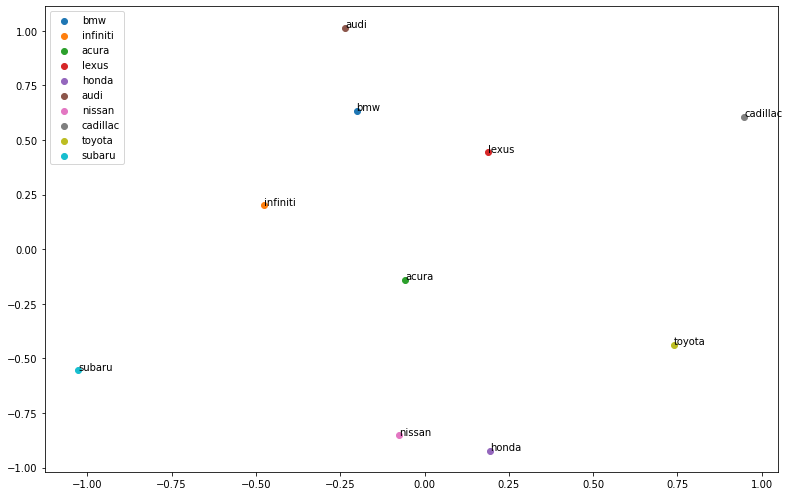

In [ ]:
#Plot the results using MDS
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [11, 7]

#Convert DF to np array
dissimilarity_array = dissimilarity_df.to_numpy()

#Use the MDS library
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=50)
diss_arr_transformed = embedding.fit_transform(dissimilarity_array)

#Plot a scatter
for i in list(range(len(top_brands))):
  c = top_brands[i]
  plt.scatter(diss_arr_transformed[i,0],
              diss_arr_transformed[i,1],
              marker='o',
              label= top_brands[i])

plt.legend()
plt.tight_layout()

#Annotate the points in the scatter plot
for i, label in enumerate(top_brands):
    plt.annotate(label, (diss_arr_transformed[i,0],
                         diss_arr_transformed[i,1]))

plt.show()

# Task E: 
  What insights can you offer to your client from your analyses in Tasks C and D 

### Context

To translate Tasks C and D into business insight, we first ensure the client understands that rather than provide granular insight, **association metrics narrow the frame of our data analysis,** which in turn allows us to **1) identify key premises** (e.g. Lexus faces the highest level of competition among all luxury brands), **2) identify key insights** (e.g. what is the essential quality of a Lexus) **3) clarify next steps for higher precision testing** (e.g. rank order the most desirable features in a luxury car), and **4) determine the most effective direction for capital and resource allocation** (e.g. Lexus Marketing must prioritize brand loyalty over brand awareness). With regard to the most strategic investment decisions, iterative analysis minimizes the distance between what we think, and what truly is.


#### Assumptions about our client

* JD Power & Associates may provide information services to any number of car manufacturers and will thus benefit from both overall market insight and brand-specific insight. 

* As an industry benchmark, JD Power & Associates is positioned to leverage data comprehensiveness and monetize data complexity in the pricing of its knowledge-based services. For this reason, we make use of qualified language (e.g. “Lexus has reason to increase investment in X” vs. “Lexus should increase investment in X”.) **Each instance of qualified language represents an area of further research and confirmation, as well as a second-sales opportunity for the client.**


#### Top 5 Similar Brands

* Nissan and Honda 2.00

* Acura and Lexus 1.73

* Honda and Acura 1.56

* Lexus and BMW 1.38

* Lexus and Infiniti 1.31


### Insights 

The most immediate insight is that each pairwise brand now knows its most direct competitor. In their respective competitive analyses, **Nissan has good reason to prioritize Honda, Acura to prioritize Lexus, and so forth.** These priorities allow for brand differentiation that is focused and deliberate. However, further analysis is required to determine the details of these associations. **The key insight is not simply in which comparisons occur often, but rather, for any given brand, which comparisons are occurring most often and for which specific features.** For example, a significant portion of Nissan and Honda co-mentions may be due to a broader association with Japanese manufacturing standards, and Toyota may actually be compared to Honda more often in discussions that revolve around specific features, the most important of which may be reliability. To arrive at this level of insight, we must conduct another lift analysis for the set of posts containing Honda and Nissan, identifying different sets for different models and the most commonly mentioned features within each set. **We can also extend our lift analysis to include other aspects of the value proposition besides vehicle features, such as after-sales service.** These lateral insights will allow these brands to identify avenues of differentiation that resonate most with their target customers. 

**The above analysis applies to each brand in each pair.**

In addition to pairwise insight, we also look at the table as a whole to see that Lexus appears in 3 out of the top 5 pairs, indicating that Lexus can be considered a benchmark in the eyes of the consumer. This leads to the key premise mentioned in our Context section: **Lexus faces the most competition among all luxury brands, as it must compete across different features against multiple brands.** As the incumbent, Lexus has good reason to prioritize brand loyalty over brand awareness, and to discover why/how they have assumed this position. 

To answer this question, we must pursue a range of intermediate questions. What percentage of the people talking about Lexus are Lexus owners themselves, and among this set, what percentage of comments are positive and negative (sentiment analysis)? Similarly, what percentage of the people talking about Lexus are not owners themselves, and what percentage of these comments are positive and negative? The answers to these questions will inform a very important premise for the Marketing department of Lexus. If the majority of people speaking about Lexus are Lexus owners themselves and are saying positive things, then there is **reason to believe that Lexus has arrived at a winning formula and that its consumers have become advocates. This coveted position must be guarded closely.** From a product development standpoint, Lexus must identify what aspects of its most popular models enthusiasts value most. **Lexus also faces a uniquely challenging question as an industry benchmark: what is the essence of Lexus? This abstract question will require more in-depth analysis with word embedding methodologies. Lexus must find ways to innovate specific features while maintaining the essence of what has made it so popular.** 

From a marketing standpoint, **Lexus has significant reason to prioritize brand loyalty over brand awareness.** They should research what are the major components of brand loyalty and which brands are implementing the most effective brand loyalty initiatives. Additionally, if a significant portion of people mentioning Lexus are non-Lexus owners, **Lexus may consider converting those aspirational consumers through new financing options, SEO and SEM revolving around keywords related to car loan and auto-financing, and targeted social media campaigns.**

In addition to analyzing the individual lift value for a given pair of brands, we also derive insight from observing above-average lift values for a given single brand. For example, Acura has significant association with both Lexus (luxury) and Honda (non-luxury), which indicates that Acura is striking a balance between two segments. **There is reason to believe that Acura will not succeed in head to head competition with Lexus, and indicates that Acura may benefit from carving out its own niche within the luxury segment.** A key question to ask (for both Lexus and Acura) is, among Acura luxury model consumers, why did they choose Acura over Lexus?

As we can see, **the benefit of our lift analysis is not in the answers it produces but rather in the questions it raises.** This is the key insight for JD Power & Associates to understand and leverage in designing their information service products. **We can set a simple framework for the client to utilize our data deliverables.**


### Insight Framework

In the graphic below, the individual cells with higher numbers and stronger green hue represent higher associations. Any individual cell with a strong green hue represents an important set of questions to explore (i.e. Nissan and Honda, Lexus and Acura, and Acura and Honda.) Any column (or row) that is, on average, “more green”, also represents an important set of questions to explore (i.e. Lexus). 

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1mj0XRZD1QlwrYjlcAFJ1tk1LsLKyRD1q'/>
<figcaption>Similarity Matrix</figcaption></center>
</figure>

Also, while there is limited value in focusing on red cells (individual pairwise brands that are not connected), there may be tremendous insight in focusing on any column (or row), that is, on average, “more red”. We can see that Subaru is the “most red” column, with no lift values above 0.84. This means that, despite being one of the most commonly mentioned brands in all posts of our data set, it is rarely mentioned in comparison to any other brand. **Thus, there is reason to believe that Subaru has successfully carved out a very unique niche, and even more reason for Subaru to define that niche and lean in.** Further analysis will focus first on understanding the mentions of Subaru in general forums: is there a general quality or aspect of owning a Subaru that consumers most often refer to, or are there specific features of specific models that are driving Subaru mentions? In either case, the next step would be to identify the top features and associations with Subaru, both in Subaru-specific and general forums, and to identify the differences between these two groups. Put another way, is what makes a Subaru a Subaru only visible to those who own a Subaru? **Is that visibility attributable to insufficient marketing, or are Subaru owners truly unique in their preferences?** The answer to this question may warrant diverting more budget resources to the Subaru Digital Marketing effort, specifically **away from mass market campaigns and more to grassroots targeting activities based on revised consumer persona profiles.**

**With this framework in mind, there is reason to apply the Lexus analysis to Infiniti and Acura, and the Subaru analysis to Cadillac and Toyota.** 

The insights above are also visualized in our MDS plot. We observe a general cluster among Audi, BMW, Lexus, Infiniti and Acura, as well as a cluster between Nissan and Honda. We also see Cadillac, Toyota, and Subaru outside of these clusters. 




# Task F: 
**What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.**

We reviewed manually the word count file, and hand-picked the top attributes. The list "top_attributes" contains more than 5 attributes, but they appear in the order of their rank in the word count.

In [ ]:
#Top 5 attributes
top_5_attributes = top_attributes[0:5]
print("The top 5 attributes are:", top_5_attributes)

#Top 5 brands list
top_5_brand_list = top_brands[0:5]
print("The top 5 brands are:", top_5_brand_list)

#Count the number of each brand in top 5 brand and put in dict top_5_brand
top_5_brand = {}
for brand in top_5_brand_list:
  top_5_brand[brand] =  count_messages_with_word(data_df, brand)

#Count the number of each attribute in top 5 attributes and put in dict attribute
num_attribute = {}
for att in top_5_attributes:
  num_attribute[att] = count_messages_with_word(data_df, att)

print(top_5_brand, num_attribute)

#Count both the number of messages contain attribute and brand
num_top_5_att = defaultdict(dict)
for brand in top_5_brand_list:
  for att in top_5_attributes:
    num_top_5_att[brand][att] = count_messages_with_word(data_df, brand, att)
    
print(num_top_5_att)

The top 5 attributes are: ['performance', 'luxury', 'engine', 'price', 'interior']
The top 5 brands are: ['bmw', 'infiniti', 'acura', 'lexus', 'honda']
{'bmw': 1828, 'infiniti': 1123, 'acura': 624, 'lexus': 489, 'honda': 615} {'performance': 687, 'luxury': 477, 'engine': 572, 'price': 574, 'interior': 364}
defaultdict(<class 'dict'>, {'bmw': {'performance': 252, 'luxury': 130, 'engine': 196, 'price': 227, 'interior': 96}, 'infiniti': {'performance': 124, 'luxury': 76, 'engine': 95, 'price': 111, 'interior': 110}, 'acura': {'performance': 49, 'luxury': 54, 'engine': 55, 'price': 54, 'interior': 32}, 'lexus': {'performance': 54, 'luxury': 59, 'engine': 37, 'price': 47, 'interior': 38}, 'honda': {'performance': 70, 'luxury': 58, 'engine': 53, 'price': 55, 'interior': 21}})


In [ ]:
top5_att_lift_df = pd.DataFrame(0.0, index=top_5_brand_list, columns=top_5_attributes)

# Calculate Lift values for every brand in top 5 brand and top 5 attributes
for brand in top_5_brand_list:
    for att in top_5_attributes:
        lift_value = calc_lift_vals( top_5_brand[brand],
                                     num_attribute[att], 
                                     num_top_5_att[brand][att], 
                                     N)
      
        # Store the lift value calculation in top5_att_lift panda df
        top5_att_lift_df.at[brand, att] = lift_value

print(top5_att_lift_df.to_markdown())

|          |   performance |   luxury |   engine |    price |   interior |
|:---------|--------------:|---------:|---------:|---------:|-----------:|
| bmw      |      1.00934  | 0.749923 | 0.94287  | 1.08819  |   0.725708 |
| infiniti |      0.80845  | 0.713647 | 0.743902 | 0.866162 |   1.35357  |
| acura    |      0.57494  | 0.912554 | 0.775086 | 0.758342 |   0.70865  |
| lexus    |      0.80853  | 1.27231  | 0.665372 | 0.842258 |   1.07384  |
| honda    |      0.833363 | 0.994495 | 0.757832 | 0.783689 |   0.471857 |


In order to get additional insights, we run this exercise with more attributes and more brands.

In [ ]:
#Top attributes
top_n_attributes = top_attributes
print("The top attributes are:", top_n_attributes)

#Top brands list
top_n_brand_list = top_brands
print("The top brands are:", top_n_brand_list)

#Count the number of each brand in top 5 brand and put in dict top_n_brand_dict
top_n_brand_dict = {}
for brand in top_n_brand_list:
  top_n_brand_dict[brand] =  count_messages_with_word(data_df, brand)

#Count the number of each attribute in top 5 attributes and put in dict attribute
num_attribute = {}
for att in top_n_attributes:
  num_attribute[att] = count_messages_with_word(data_df, att)

#Count both the number of messages contain attribute and brand
num_top_n_att = defaultdict(dict)
for brand in top_n_brand_list:
  for att in top_n_attributes:
    num_top_n_att[brand][att] = count_messages_with_word(data_df, brand, att)
    
topn_att_lift_df = pd.DataFrame(0.0, index=top_n_brand_list, columns=top_n_attributes)

# Calculate Lift values for every brand in top 5 brand and top 5 attributes
for brand in top_n_brand_list:
    for att in top_n_attributes:
        lift_value = calc_lift_vals( top_n_brand_dict[brand],
                                     num_attribute[att], 
                                     num_top_n_att[brand][att], 
                                     N)
      
        # Store the lift value calculation in top5_att_lift panda df
        topn_att_lift_df.at[brand, att] = lift_value

print(topn_att_lift_df.to_markdown())

The top attributes are: ['performance', 'luxury', 'engine', 'price', 'interior', 'handling', 'power', 'sport']
The top brands are: ['bmw', 'infiniti', 'acura', 'lexus', 'honda', 'audi', 'nissan', 'cadillac', 'toyota', 'subaru']
|          |   performance |   luxury |   engine |    price |   interior |   handling |    power |    sport |
|:---------|--------------:|---------:|---------:|---------:|-----------:|-----------:|---------:|---------:|
| bmw      |      1.00934  | 0.749923 | 0.94287  | 1.08819  |   0.725708 |   1.10867  | 0.933082 | 1.03187  |
| infiniti |      0.80845  | 0.713647 | 0.743902 | 0.866162 |   1.35357  |   0.934952 | 0.914413 | 0.885222 |
| acura    |      0.57494  | 0.912554 | 0.775086 | 0.758342 |   0.70865  |   0.645654 | 0.962287 | 0.871448 |
| lexus    |      0.80853  | 1.27231  | 0.665372 | 0.842258 |   1.07384  |   0.724036 | 0.711855 | 0.868775 |
| honda    |      0.833363 | 0.994495 | 0.757832 | 0.783689 |   0.471857 |   0.516142 | 0.820716 | 0.607888 |
| 

# Task G: 
What advice will you give to your client from Task F? For this assignment, you can assume that all sentiments are positive. 

Our feature analysis yields the following:

#### Top Features


* Performance

* Luxury

* Engine

* Price

* Interior

* Handling

* Power

* Sport

#### Top Feature-Brand Associations 

* Subaru and luxury 2.03

* Audi and interior 1.35

* Infiniti and interior 1.35

* Subaru and interior 1.33

* Lexus and luxury 1.27

**The high association between Subaru and luxury is particularly notable considering the low association between Subaru and other luxury brands.** Subaru and other luxury competitors alike should focus on the nature of this association. Specifically, using word frequency analysis, we must identify the major points of emphasis in discussions involving Subaru and luxury. Below, we see some representative examples.

* “for us subaru fans smile time is coming really soon don t get me wrong i like the updated acura tl infiniti g35 w awd but if you have driven a legacy you know the potential was there a good car waiting for an engine well now we have the engine i can t wait to see the new legacy vs the rest of the near luxury sport sedans wagons http www need desire com main html sign of things to come 250hp 0 60 5 5 secs”

* “looks like subaru is finally serious about competing with the germans and the other japanese auto makers notice the new legacy borrows a few styling cues from both the new and old acura tl”

* “it s because of these purely pedestrian cheap platform cars that we have the nice affordable performance car options we have today the recent crossover suv awd sedan platforms today owe themselves to subaru the legacy outback started the trend the wrx kicked it up a notch for sedans…”

**Thus, a cursory look yields a worthy hypothesis to explore: the Subaru Legacy go-to-market strategy successfully carved a market niche for Affordable Luxury Sport.** To confirm this hypothesis, we may run a lift analysis between Subaru Legacy and luxury, sport, and affordability. Pending confirmation, we have reason to analyze Subaru’s go-to market strategy with the Legacy, and **derive insights for any other car manufacturer who are in a position to move away from head-to-head competition with a well established incumbent.**

Outside of the Subaru-luxury connection, we see more straight forward insights. We see that Infiniti and Audi are both associated with “interior”. Both of these brands have reason to identify the most sought after interior features, as well as the specific aspects of their own interior design that resonates with their customers. To the extent that Infiniti and Audi have distinctive and recognizable interior design elements, such analyses from both of these influencer brands may lead to **increasingly differentiated interior aesthetics and/or ergonomic trends in the industry. Other brands wishing to increase their interior scores have reason to pay attention to these trends.**

Finally, we can see that among the most referenced features, only two features— luxury and interior— seem to be often mentioned alongside the most mentioned brands. This presents a **potential market opportunity for any brand that already has a higher position with regard to any of the most mentioned features.** For example, “handling” is a commonly sought after feature, yet none of the most popular brands seem to be known for it. For any brand that already boasts higher quality handling, there may be reason to consider a coordinated effort to establish itself as iconic with regard to handling. This same thought process applies to any of the features for which no icon exists, and for which iconographic association is possible.


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1x9F8QEWvt6g-nAJllNaU66Flb5zY6wUG'/>
<figcaption>Lift Values for attributes and brands</figcaption></center>
</figure>

# Task H: 
**Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?**

To calculate the most aspirational brand we ran a lift value analysis with all brands and the "aspiration". However, because the key words that can represent aspiration were not replaced during the scraping, we built a new function to filter messages that contain either "word_1" OR "word_2". We used this function to get the messages that contain either of these words:
* love to
* hope to
* want to
* would love
* dream of

And used this filtered dataset to calculate the lift values with all the brands, while making sure we calculate the lift values with the right inputs in the formula:
* N = Total number of messages
* #(A) = Total number of messages where the brand is mentioned in the whole dataset
* #(B) = Total number of messages in the "aspirational" dataset.
* #(A,B) = Total number of messages where the brand appears in the "aspirational" dataset. Which is the same as the total number of messages where the brand AND "aspiration" appears together in the whole dataset.

In [ ]:
#TASK H) Find aspirational brands

# Look for the terms: 
# "hope to", "dream of", "want to", "love to", "would love"
# this is the same as if we replaced each word for "aspiration"
# messages that contain 'love to' OR 'hope to' OR....
aspirational_df = find_messages_with_any_str(data_df,
                                            'love to',
                                            'hope to',
                                            'want to',
                                            'would love',
                                            'dream of')
#Count number of messages with aspiration (count each message only once)
N_aspiration = count_messages(aspirational_df)

#Count number of messages with (aspiration, brand) where brand is in all_brands
num_brands_aspiration_dict = {}
for brand in all_brands:
  num_brands_aspiration_dict[brand] = count_messages_with_word(aspirational_df, brand)

#Count number of messages for brand in all_brands
num_brands_dict = {}
for brand in all_brands:
  num_brands_dict[brand] = count_messages_with_word(data_df, brand)

#Calculate the Lift values for brand in all_brands and "aspiration"
lift_values_df = pd.DataFrame(0.0, index=all_brands, columns=['aspiration'])

# Calculate Lift values for every brand in top 5 brand and top 5 attributes
for brand in all_brands:
        lift_value = calc_lift_vals( num_brands_dict[brand],
                                     N_aspiration, 
                                     num_brands_aspiration_dict[brand], 
                                     N)
      
        # Store the lift value calculation in top5_att_lift panda df
        lift_values_df.at[brand, 'aspiration'] = lift_value

#Get the brand with highest Lift
highest_aspiration_df = lift_values_df.sort_values(by=['aspiration'], ascending=False).iloc[0:5,:]
print(lift_values_df.sort_values(by=['aspiration'], ascending=False).iloc[0:5,:].to_markdown())

|            |   aspiration |
|:-----------|-------------:|
| mitsubishi |      2.72518 |
| suzuki     |      2.61163 |
| mazda      |      2.58767 |
| buick      |      2.47418 |
| volkswagen |      2.05988 |


#### Top Aspirational Brands

* Mitsubishi 2.72

* Suzuki 2.61

* Mazda 2.59

* Buick 2.47

* Volkswagon 2.06

Our findings indicate that Mitsubishi is the most “aspirational” brand, a strange result considering Mitsubishi’s market position. Neither are the next most aspirational brands, Suzuki and Mazda, associated with high-end luxury. Thus, there is reason to dive deeper into the connection between these brands and the idea of “aspiration”. 

A closer look at the qualitative data provides an answer to our question, represented by the excerpts below:.

* “… a low grade civic volkswagon vw mitsubishi can be modded to achieve supercar level….”

* “…I might start modding it summer tires rear sway bar coil overs i h e to make it sportier and add some personality or i may finally get serious about leaving this segment behind do i really want to be here and replace it with something more sporting and less luxurious a 95ish porsche 911 a 98ish bmw m3 or perhaps a brand new mitsubishi evo rs they re all on my mind any thoughts opinions…”

* “… you may as well look at the wrx sti and mitsubishi evo for that price range if you re looking for more space or less junk in the interior but want to avoid the tl and cts…”

As these comments indicate, it seems that **Mitsubishi is not the car that buyers truly aspire towards. Instead, as they discuss their aspirations, buyers refer to Mitsubishi as a good car to purchase and modify to achieve similar features of performance and style associated with the brand they aspire towards.** In other words, Mitsubishi represents higher value for price, and acts as a substitute good for the aspirational brand.

**This is a perfect example of how lift analysis may not yield significant granular insight, but rather opens lateral opportunities.** The implications for Mitsubishi are significant. Further lift analysis should be conducted to confirm the correlation between Mitsubishi and car modification. Which models are the most common to modify? What about Mitsubishi makes it modifiable? These questions are as important for Mitsubishi to answer as they are for Mitsubishi’s competitors in this new “modifiable car” class. It also creates new avenues for Mitsubishi and its competitors to reach its target customers. **Mitsubishi has reason to invest significant resources into engaging with and understanding the community of modified car enthusiasts, which may include strategic partnerships with media outlets such as Import Tuner and and players in the vendor supply chain for car modification.**